In [67]:
import numpy as np
from tensorflow import keras
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [68]:
# Загрузка данных
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
train_labels_categorical = to_categorical(train_labels)
test_labels_categorical = to_categorical(test_labels)



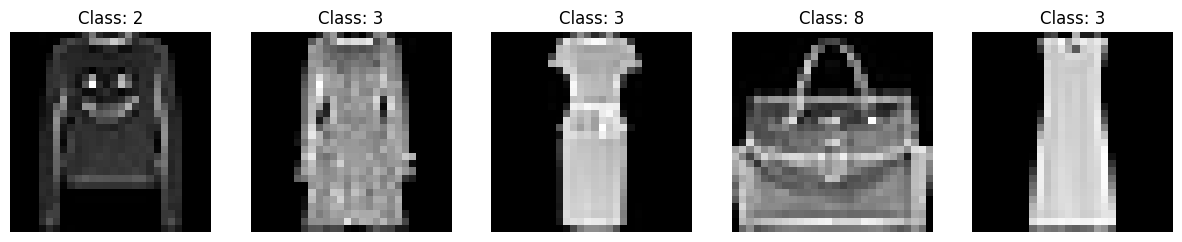

In [69]:
import random

indices = random.sample(range(len(train_images)), 5)

fig, axs = plt.subplots(1, 5, figsize=(15, 15))

for i, idx in enumerate(indices):
    img = np.reshape(train_images[idx], (28, 28))
    axs[i].imshow(img, cmap='gray')
    axs[i].axis('off')

    axs[i].set_title("Class: {}".format(train_labels[idx]))
    

In [70]:
print(train_images.shape)
print(type(train_images[0]))
print(len(train_images[0]))

(60000, 28, 28, 1)
<class 'numpy.ndarray'>
28


In [77]:
from tensorflow import keras


# Определение модели
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation="relu"),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),

    keras.layers.Dense(10, activation="softmax")
])

# Компиляция модели
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [78]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 576)              

In [79]:
# Обучение модели

history = model.fit(train_images, train_labels_categorical, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 0.6390 - accuracy: 0.7602
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3764 - accuracy: 0.8615
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3158 - accuracy: 0.8845
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2801 - accuracy: 0.8968
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2550 - accuracy: 0.9065
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2369 - accuracy: 0.9135
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2184 - accuracy: 0.9196
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2021 - accuracy: 0.9251
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1887 - accuracy: 0.9299
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1761 - accuracy: 0.9348

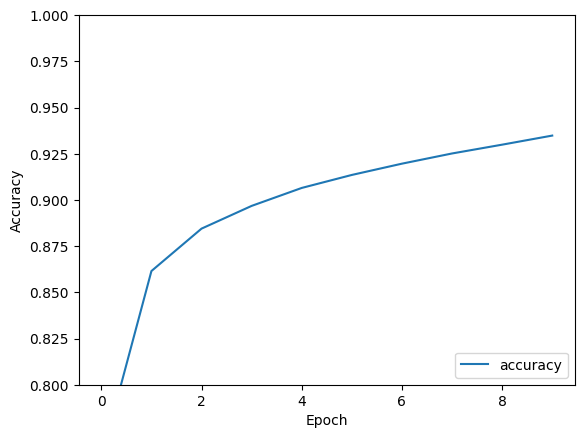

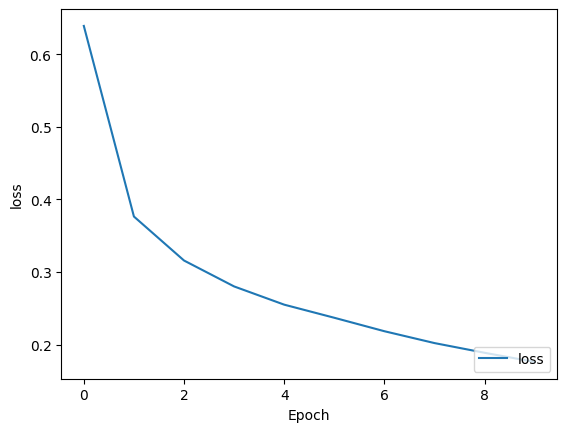

In [80]:
import matplotlib.pyplot as plt

# Графики обучения
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()

# Графики обучения
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()

In [81]:
# Оценка модели на тестовых данных
test_loss, test_acc = model.evaluate(test_images, test_labels_categorical)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2632 - accuracy: 0.9111
Test accuracy: 0.9110999703407288


1/1 [==============================] - 0s 22ms/step
3
1/1 [==============================] - 0s 20ms/step
7
1/1 [==============================] - 0s 21ms/step
3
1/1 [==============================] - 0s 18ms/step
7
1/1 [==============================] - 0s 18ms/step
1


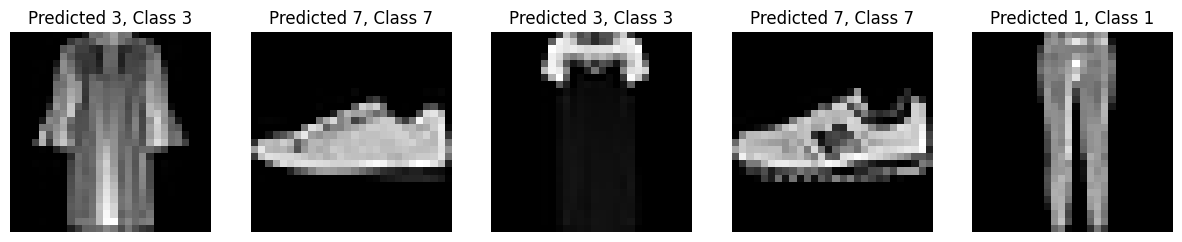

In [83]:
indices = random.sample(range(len(test_images)), 5)

fig, axs = plt.subplots(1, 5, figsize=(15, 15))

for i, idx in enumerate(indices):
    img = np.reshape(test_images[idx], (28, 28))
    axs[i].imshow(img, cmap='gray')
    axs[i].axis('off')

    pred = np.argmax(model.predict(np.array([test_images[idx]])))
    print(test_labels[idx])
    axs[i].set_title("Predicted {}, Class {}".format(pred, test_labels[idx]))